In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.geocoders import Nominatim
from global_land_mask import globe
from tqdm import tqdm

from matplotlib import image

EAST_POINT = -113.8
WEST_POINT = -124.49
NORTH_POINT = 42.05
SOUTH_POINT = 32.45


In [3]:
def plot_lat_long(df, s=4, c='b',
    save_file_path=None, 
    cal_pic_file_path='data/california.png'):
    """ Function to plot lat / long points on california map"""
    image_array = image.imread(cal_pic_file_path)
    _, ax = plt.subplots(figsize=(10,8))
    extent = [WEST_POINT, EAST_POINT, SOUTH_POINT, NORTH_POINT]
    ax.imshow(image_array, extent=extent)
    for _, row in df.iterrows():
        ax.scatter(row['Longitude'], row['Latitude'], c=c, s=s)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    if save_file_path is not None:
        plt.savefig(save_file_path)
    plt.show()

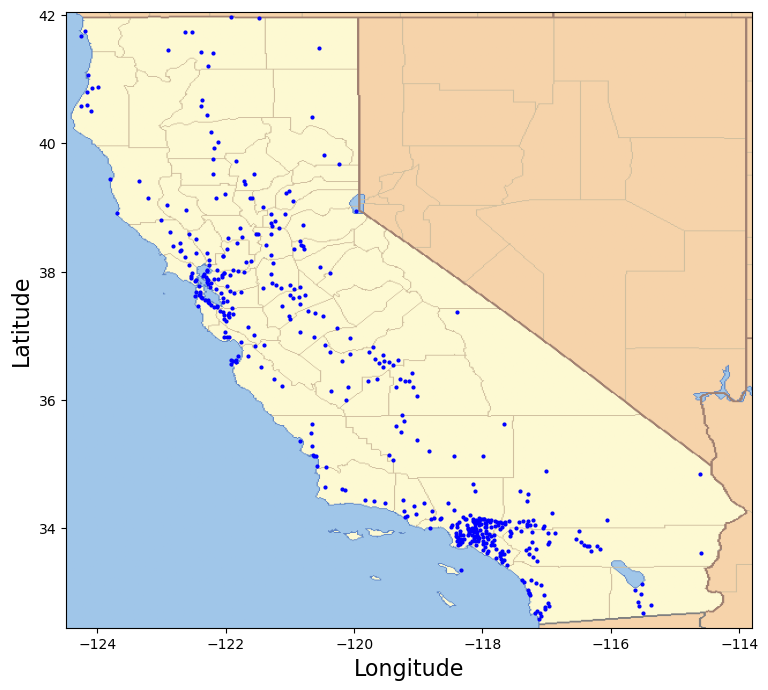

In [4]:
df_lat_long = pd.read_csv('data/cal_cities_lat_long.csv')
plot_lat_long(df_lat_long, save_file_path='data/cal_cities_plot.png')

## Compute all coordinates within extremes of California Lat / Long borders

In [5]:
RESOLUTION = 5  # In Miles

earth_radius = 3960.0
degrees_to_radians = math.pi/180.0
radians_to_degrees = 180.0/math.pi

delta_lat = math.sin(math.pi / 3) * (RESOLUTION / earth_radius) * radians_to_degrees

def delta_long(latitude):
    "Given a latitude and a distance west, return the change in longitude."
    # Find the radius of a circle around the earth at given latitude.
    global RESOLUTION
    r = earth_radius * math.cos(latitude * degrees_to_radians)
    return (RESOLUTION / r) * radians_to_degrees

coords = []
counter = 0
lat = SOUTH_POINT
while lat <= NORTH_POINT:
    long = WEST_POINT
    while long <= EAST_POINT:
        if counter % 2 == 0:
            coord = (lat, long)
        else:
            coord = (lat, long + delta_long(lat) / 2)
        if globe.is_land(*coord):
            coords.append(coord)
        long += delta_long(lat)
    lat += delta_lat
    counter += 1

## Filter coorinates to remove points in ocean or other states

In [12]:
ca_coords = []

geolocator = Nominatim(user_agent="geoapiExercises")

for coord in tqdm(coords):
    geo_info = geolocator.reverse(','.join([str(c) for c in coord]))
    state = geo_info.raw['address']['state']
    if state == 'California':
        ca_coords.append(coord)

ca_coords = pd.DataFrame(ca_coords, columns=['Latitude', 'Longitude'])

100%|██████████| 13435/13435 [1:52:20<00:00,  1.99it/s] 


## Plot point of CA map and save image

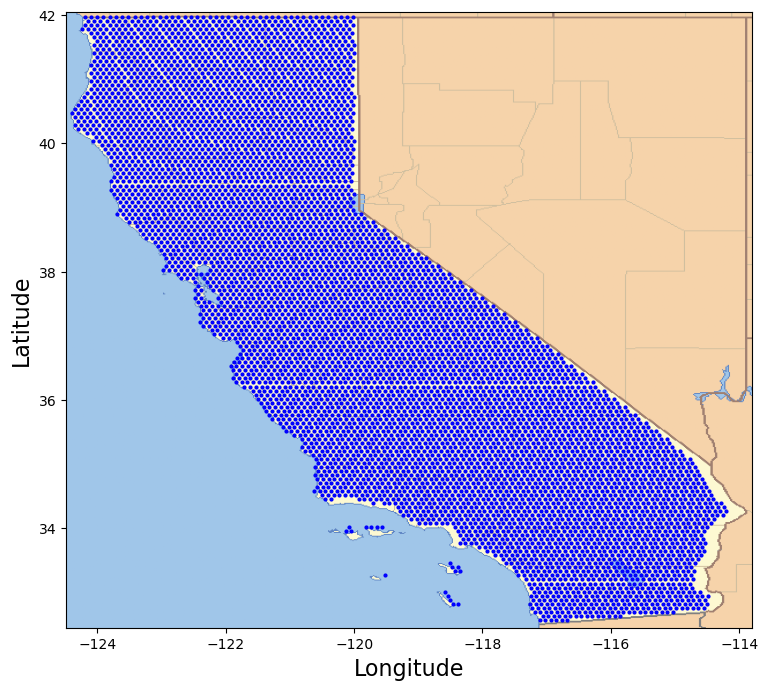

In [18]:
plot_lat_long(ca_coords, save_file_path='data/test')

In [ ]:
x = 5